In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# Exercises

###### 3.1 

$ \vec{x} = [x_1, x_2]^T$

$ \vec{y} = [y_1, y_2]^T$

Show that 

$\langle \vec{x}, \vec{y} \rangle := x_1y_1 - (x_1y_2 + x_2y_1) + 2(x_2y_2) $ is an inner product.

[Prove that a function is an inner product](https://math.stackexchange.com/questions/217486/prove-that-a-function-is-an-inner-product)


If you ever want to show something is an inner product, you need to show three things:

1. Symmetry:  ⟨𝑓,𝑔⟩=⟨𝑔,𝑓⟩ (Or, if the field is the complex numbers, ⟨𝑓,𝑔⟩=⟨𝑔,𝑓⟩, i.e. "conjugate symmetry.)

2. Linearity: ⟨𝛼𝑓,𝑔⟩=𝛼⟨𝑓,𝑔⟩. Notice this also implies ⟨𝑓,𝛼𝑔⟩=𝛼⟨𝑓,𝑔⟩ (𝛼 in the complex case) by symmetry.

3. Positive-definite: ⟨𝑓,𝑓⟩≥0 with equality if and only if 𝑓=0, the zero function.

In [2]:
x = np.array([1,-2]).reshape(2, 1)
y = np.array([1, 3]).reshape(2, 1)

def inner_product(y, x):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    return x1*y1 - (x1*y2 + x2*y1) + 2*x2*y2

How to solve
1. show ⟨x,y⟩=⟨y,x⟩
2. show ⟨Cx,y⟩= C⟨x,y⟩
3. show ⟨x,x⟩ > 0 except for x=0

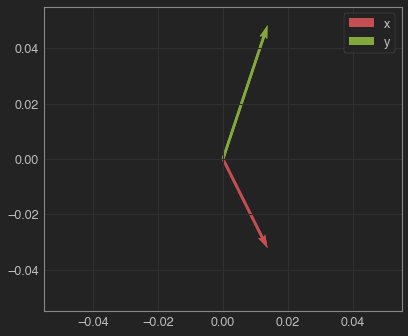

inner product [-12]


In [3]:
# plot two vectors to visualize
origin = ([[0, 0], [0, 0]])
x_plot = plt.quiver(*origin, *x, color=['r'], scale=8, label='x')
y_plot = plt.quiver(*origin, *y, color='g', scale=8, label='y')
plt.grid(True)
plt.legend()
plt.show()

print('inner product', inner_product(x, y))

###### 3.2
Consider $ \mathbb{R}^2$ with $\langle *,*\rangle $ defined for all $\vec{x}, \vec{y}$ in $\mathbb{R}^2$ as

$\langle \vec{x}, \vec{y} \rangle : = x^T \begin{bmatrix}
2&0 \\
1&2 \end{bmatrix} y $

$ A = \begin{bmatrix}
2&0 \\
1&2 \end{bmatrix} $

is $\langle *,*\rangle $ an inner product?

In [4]:
# no, the matrix A is not symmetric
A = np.array([[2, 0], [1, 2]]).reshape(2, 2)
A

array([[2, 0],
       [1, 2]])

In [5]:
A.T

array([[2, 1],
       [0, 2]])

###### 3.3
Compute the distance between $$ \vec{x} = \begin{bmatrix}
1 \\
2 \\
3 \end{bmatrix}, \vec{y} = \begin{bmatrix}
-1 \\
-1 \\
0 \end{bmatrix}  $$

using


a. $\langle \vec{x}, \vec{y} \rangle := x^Ty $

In [6]:
x = np.array([1, 2, 3]).reshape(3, 1)
y = np.array([-1, -1, 0]).reshape(3, 1)

inner_product = np.matmul(x.T, y)
print(inner_product)

[[-3]]


b. $\langle \vec{x}, \vec{y} \rangle := x^TAy, A = \begin{bmatrix}
2&1&0 \\
1&3&-1 \\
0&-1&2 \end{bmatrix} $

In [7]:
A = np.array([[2, 1, 0], [1, 3, -1], [0, -1, 2]]).reshape(3, 3)

inner_product_A = np.matmul(x.T, np.matmul(A, y))
print(inner_product)

[[-3]]
